# Tensorflow input Pipeline
The input pipeline is a quick and easy utility provided in tf. data api to make complex input pipelines from simple and reusable codes and all in few lines of code. It also allows handling a large amount of data, thus giving low-end machines an advantage in computing them.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
daily_sales_numbers = [21, 22, -108, 31, -1, 32, 34,31] #Assume in US Dollars

In [4]:
#Creating a tensor dataset from a list
tf_dataset=tf.data.Dataset.from_tensor_slices(daily_sales_numbers)
tf_dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [5]:
for sales in tf_dataset:
    print(sales)#Sales is in the form of tensor

tf.Tensor(21, shape=(), dtype=int32)
tf.Tensor(22, shape=(), dtype=int32)
tf.Tensor(-108, shape=(), dtype=int32)
tf.Tensor(31, shape=(), dtype=int32)
tf.Tensor(-1, shape=(), dtype=int32)
tf.Tensor(32, shape=(), dtype=int32)
tf.Tensor(34, shape=(), dtype=int32)
tf.Tensor(31, shape=(), dtype=int32)


In [6]:
#Printing the values of sales
for sales in tf_dataset:
    print(sales.numpy())

21
22
-108
31
-1
32
34
31


In [7]:
#Another way of printing values of sales
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

21
22
-108
31
-1
32
34
31


Here, we can observe that some sales are negative and sales cannot be negative and hence, they are considered as false data and will be removed

In [8]:
#filtering all the negative sales (invalid sales)
tf_dataset=tf_dataset.filter(lambda x: x>=0)
for sales in tf_dataset:
    print(sales.numpy())

21
22
31
32
34
31


Here, the sales are in US Dollars. Hence , converting them into indian Rupee (let 1 US $ = 75 rupees)

In [9]:
#Converting dollar into rupees by multiplying with 75
tf_dataset=tf_dataset.map(lambda x: x*75)
for sales in tf_dataset:
    print(sales.numpy())

1575
1650
2325
2400
2550
2325


In [10]:
#Suffling of elements
tf_dataset=tf_dataset.shuffle(buffer_size=3)
for sales in tf_dataset:
    print(sales.numpy())

2325
1650
2550
2325
1575
2400


How shuffle() works is explained here 
https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset

In [12]:
#Batching
for sales in tf_dataset.batch(3):# here 3 indicates each batch contains 3 elements
    print(sales.numpy())

[1575 2325 2550]
[2325 2400 1650]


In [13]:
for sales in tf_dataset.batch(2):# here 2 indicates each batch contains 2 elements
    print(sales.numpy())

[1650 1575]
[2325 2550]
[2400 2325]


In [14]:
for sales in tf_dataset.batch(4):# here 4 indicates each batch contains 4 elements
    print(sales.numpy())

[2325 1650 1575 2400]
[2325 2550]


**Filtering, Mapping, Shuffling, and Batching in a single line**

In [19]:
tf_dataset1=tf.data.Dataset.from_tensor_slices(daily_sales_numbers)
tf_dataset1=tf_dataset1.filter(lambda x : x>=0).map(lambda y : y*75).shuffle(buffer_size=3).batch(3)
for sales in tf_dataset1:
    print(sales.numpy())

[1650 1575 2400]
[2325 2325 2550]


**Loading an Image dataset**

In [2]:
#Sample code to check how the path works
images_ds=tf.data.Dataset.list_files("D:/programming languages/datasets/celebrity images/train",shuffle=True)
for itr in images_ds:
    print(itr.numpy())

b'D:\\programming languages\\datasets\\celebrity images\\train'


In [3]:
#Sample code to check how the path works
images_ds=tf.data.Dataset.list_files("D:/programming languages/datasets/celebrity images/train/*",shuffle=True)
for itr in images_ds:
    print(itr.numpy())

b'D:\\programming languages\\datasets\\celebrity images\\train\\Maria Sharapova'
b'D:\\programming languages\\datasets\\celebrity images\\train\\Barack Obama'
b'D:\\programming languages\\datasets\\celebrity images\\train\\MS Dhoni'
b'D:\\programming languages\\datasets\\celebrity images\\train\\PV Sindhu'
b'D:\\programming languages\\datasets\\celebrity images\\train\\Roger Federer'


In [4]:
#Loading all the image paths
images_ds=tf.data.Dataset.list_files("D:/programming languages/datasets/celebrity images/train/*/*",shuffle=True)
#By default shuffle = True
images_ds

<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [5]:
for image in images_ds.take(5):
    print(image.numpy())

b'D:\\programming languages\\datasets\\celebrity images\\train\\Roger Federer\\switzerlands-roger-federer-returns-against-polands-hubert-hurkacz-during-their-mens-quarter.jpg'
b'D:\\programming languages\\datasets\\celebrity images\\train\\Barack Obama\\illinois-state-sen-barack-obama-who-is-a-candidate-for-us-senate-speaks-at-an-african-american.jpg'
b'D:\\programming languages\\datasets\\celebrity images\\train\\Barack Obama\\in-this-undated-image-former-president-barack-obama-takes-a-break-from-learning-to-kitesurf-at.jpg'
b'D:\\programming languages\\datasets\\celebrity images\\train\\MS Dhoni\\topshot-indias-mahendra-singh-dhoni-looks-on-after-a-session-in-the-nets-as-he-takes-part-in (1).jpg'
b'D:\\programming languages\\datasets\\celebrity images\\train\\MS Dhoni\\ms-dhoni-of-india-during-the-icc-cricket-world-cup-match-between-south-africa-and-india-at-vca.jpg'


In [6]:
#getting the label (Celebrity name) from the path
for image_path in images_ds.take(1):
    print(str(image_path.numpy()).split("\\"))

["b'D:", '', 'programming languages', '', 'datasets', '', 'celebrity images', '', 'train', '', 'MS Dhoni', '', "m-s-dhoni-of-india-walks-to-the-pavilion-after-being-dismissed-during-the-group-stage-match.jpg'"]


In [7]:
for image_path in images_ds.take(1):
    print(str(image_path.numpy()).split("\\")[-3]) # Celebrity name is at last third position and hence -3 is used

Barack Obama


In [8]:
celebrity_names=["Maria Sharapova","PV Sindhu","Barack Obama","Roger Federer","MS Dhoni"]

In [9]:
def get_labels_with_name(image_path):
    return str(image_path.numpy()).split("\\")[-3]

In [10]:
def get_labels(image_path):
    return celebrity_names.index(str(image_path.numpy()).split("\\")[-3])

In [11]:
for image_path in images_ds.take(10):
    print(get_labels_with_name(image_path),get_labels(image_path))

PV Sindhu 1
MS Dhoni 4
Maria Sharapova 0
Maria Sharapova 0
Roger Federer 3
PV Sindhu 1
MS Dhoni 4
MS Dhoni 4
PV Sindhu 1
MS Dhoni 4


In [31]:
#Another method for getting labels using tensorflow
"""import os
def get_label(file_path):
    return tf.strings.split(image_path,os.path.sep)[-2]""" 
def get_label_with_name(image_path):
    return tf.strings.split(image_path, "\\")[-2]

In [32]:
for image_path in images_ds.take(5):
    print(get_label_with_name(image_path))

tf.Tensor(b'Roger Federer', shape=(), dtype=string)
tf.Tensor(b'PV Sindhu', shape=(), dtype=string)
tf.Tensor(b'Maria Sharapova', shape=(), dtype=string)
tf.Tensor(b'PV Sindhu', shape=(), dtype=string)
tf.Tensor(b'PV Sindhu', shape=(), dtype=string)


In [22]:
def get_label(image_path):
    return celebrity_names.index(str(tf.strings.split(image_path, "\\")[-2].numpy())[2:-1])

In [23]:
for image_path in images_ds.take(5):
    print(get_label(image_path))

1
1
4
0
2


**Preparing x and y values**

In [24]:
#reading an image
for image_path in images_ds.take(1):
    img=tf.io.read_file(image_path)
    print(img)

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe1\x01,Exif\x00\x00II*\x00\x08\x00\x00\x00\x02\x00\x0e\x01\x02\x00\xed\x00\x00\x00&\x00\x00\x00\x98\x82\x02\x00\x11\x00\x00\x00\x13\x01\x00\x00\x00\x00\x00\x00MANCHESTER, ENGLAND - JUNE 16: MS Dhoni of  India during the Group Stage match of the ICC Cricket World Cup 2019 between India and Pakistan at Old Trafford on June 16, 2019 in Manchester, England.\n\n (Photo by Michael Steele/Getty Images)2019 Getty Images\xff\xe1\x06\x08http://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?>\n<x:xmpmeta xmlns:x="adobe:ns:meta/">\n\t<rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n\t\t<rdf:Description rdf:about="" xmlns:photoshop="http://ns.adobe.com/photoshop/1.0/" xmlns:Iptc4xmpCore="http://iptc.org/std/Iptc4xmpCore/1.0/xmlns/"   xmlns:GettyImagesGIFT="http://xmp.gettyimages.com/gift/1.0/" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:plus="http://ns.usepl

In [25]:
#Decoding an image
for image_path in images_ds.take(1):
    img=tf.io.read_file(image_path)
    img=tf.image.decode_jpeg(img) #img=tf.image.decode_image(img) 
    #img=tf.io.decode_jpeg(img)   #img=tf.io.decode_image(img)
    print(img)

tf.Tensor(
[[[  0   1   2]
  [  0   2   3]
  [  1   5   6]
  ...
  [ 10  29  27]
  [  7  31  31]
  [ 38  58  57]]

 [[  0   1   2]
  [  0   2   3]
  [  1   5   6]
  ...
  [ 10  26  23]
  [  0   6   4]
  [  0  16  15]]

 [[  0   1   2]
  [  0   2   3]
  [  1   5   6]
  ...
  [  0   4   0]
  [  8  21  14]
  [ 22  31  26]]

 ...

 [[ 51   1   0]
  [ 51   1   0]
  [ 51   1   0]
  ...
  [212   4   0]
  [213   4   0]
  [213   4   0]]

 [[ 51   1   0]
  [ 51   1   0]
  [ 51   1   0]
  ...
  [213   5   1]
  [214   5   0]
  [214   5   0]]

 [[ 51   1   0]
  [ 51   1   0]
  [ 51   1   0]
  ...
  [217   9   5]
  [218   9   4]
  [218   9   4]]], shape=(612, 371, 3), dtype=uint8)


In [26]:
#resizing an image
for image_path in images_ds.take(1):
    img=tf.io.read_file(image_path)
    img=tf.image.decode_jpeg(img)
    img=tf.image.resize(img,(300,300))
    print(img)

tf.Tensor(
[[[40.915733  66.378136  79.386665 ]
  [42.3872    64.92      77.9344   ]
  [44.170666  63.904003  75.03733  ]
  ...
  [37.237377  47.237377  46.237377 ]
  [37.399986  47.399986  46.399986 ]
  [38.41759   48.41759   47.41759  ]]

 [[40.2       67.32      81.572266 ]
  [41.1984    66.7568    80.9568   ]
  [44.402668  64.94134   78.88267  ]
  ...
  [41.978638  51.978638  50.978638 ]
  [42.12      52.12      51.12     ]
  [42.12      52.12      51.12     ]]

 [[37.941334  67.71467   84.744    ]
  [39.456     66.632     82.904    ]
  [40.36      64.85333   79.56     ]
  ...
  [42.86664   52.86664   51.86664  ]
  [42.4       52.4       51.4      ]
  [42.4       52.4       51.4      ]]

 ...

 [[ 0.        31.        15.       ]
  [ 0.        31.        15.       ]
  [ 0.        31.        15.       ]
  ...
  [58.813206  87.839966  36.186855 ]
  [61.679993  91.03998   33.312077 ]
  [65.17334   95.48797   31.226807 ]]

 [[ 0.        32.        13.       ]
  [ 0.        32.        1

In [43]:
#creating x and y labels with the function called "process_image"
def process_image(file_path):
    label = get_label_with_name(file_path)
    img = tf.io.read_file(file_path) # load the raw data from the file as a string
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [300, 300])
    return img, label

In [45]:
for image,label in images_ds.map(process_image).take(3):
    print(image)
    print(label)

tf.Tensor(
[[[  3.         8.         1.      ]
  [  4.56       9.559999   2.56    ]
  [  8.6       11.6        4.6     ]
  ...
  [ 98.632065  96.092064  99.272064]
  [ 95.8       90.8       94.8     ]
  [ 97.753586  92.65998   96.65998 ]]

 [[  3.54       8.54       1.54    ]
  [  4.7976     9.7976     2.7976  ]
  [  8.6       11.6        4.6     ]
  ...
  [102.22004   96.68004   99.60004 ]
  [ 99.362404  93.8224    96.7424  ]
  [100.641624  94.01998   97.220795]]

 [[  4.         9.         2.      ]
  [  5.        10.         3.      ]
  [  8.6       11.6        4.6     ]
  ...
  [107.200035  98.50004  100.6801  ]
  [106.904     96.8       99.411995]
  [106.07202   95.848     98.40405 ]]

 ...

 [[117.616005 150.72002  183.66801 ]
  [115.420006 151.80402  187.152   ]
  [107.50001  149.84001  186.27998 ]
  ...
  [ 11.380138  17.500092  23.480083]
  [ 11.688165  21.18417   29.176182]
  [ 14.860138  24.860138  33.860138]]

 [[118.03841  152.52     184.7792  ]
  [116.1176   153.7976   1

In [47]:
#creating final dataset consisting of features and labels
final_ds=images_ds.map(process_image)
final_ds

<MapDataset element_spec=(TensorSpec(shape=(300, 300, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [53]:
for image,label in final_ds.take(3):
    print(image.numpy()[0][0])
    print(label)

[5. 4. 0.]
tf.Tensor(b'PV Sindhu', shape=(), dtype=string)
[ 25.   2. 196.]
tf.Tensor(b'Maria Sharapova', shape=(), dtype=string)
[ 27.  24. 105.]
tf.Tensor(b'Maria Sharapova', shape=(), dtype=string)


In [57]:
#scaling images
def scale(image,label):
    return image/255,label

In [55]:
final_scaled_ds=final_ds.map(scale)

In [56]:
for image,label in final_scaled_ds.take(3):
    print(image.numpy()[0][0])
    print(label)

[0.5392941  0.43733332 0.104     ]
tf.Tensor(b'Barack Obama', shape=(), dtype=string)
[0.2732549  0.28372547 0.24907842]
tf.Tensor(b'Barack Obama', shape=(), dtype=string)
[0.11764706 0.11372549 0.13333334]
tf.Tensor(b'MS Dhoni', shape=(), dtype=string)


**Doing all the above stuff in a single line**

In [58]:
images_ds1=tf.data.Dataset.list_files("D:/programming languages/datasets/celebrity images/train/*/*",shuffle=True)

In [59]:
final_images_ds1=images_ds1.map(process_image).map(scale)

In [60]:
for image,label in final_images_ds1.take(3):
    print(image.numpy()[0][0])
    print(label)

[0.03921569 0.03921569 0.04705882]
tf.Tensor(b'PV Sindhu', shape=(), dtype=string)
[0.14117648 0.14901961 0.09411765]
tf.Tensor(b'Roger Federer', shape=(), dtype=string)
[0.98039216 0.99607843 1.        ]
tf.Tensor(b'MS Dhoni', shape=(), dtype=string)


# Exercise

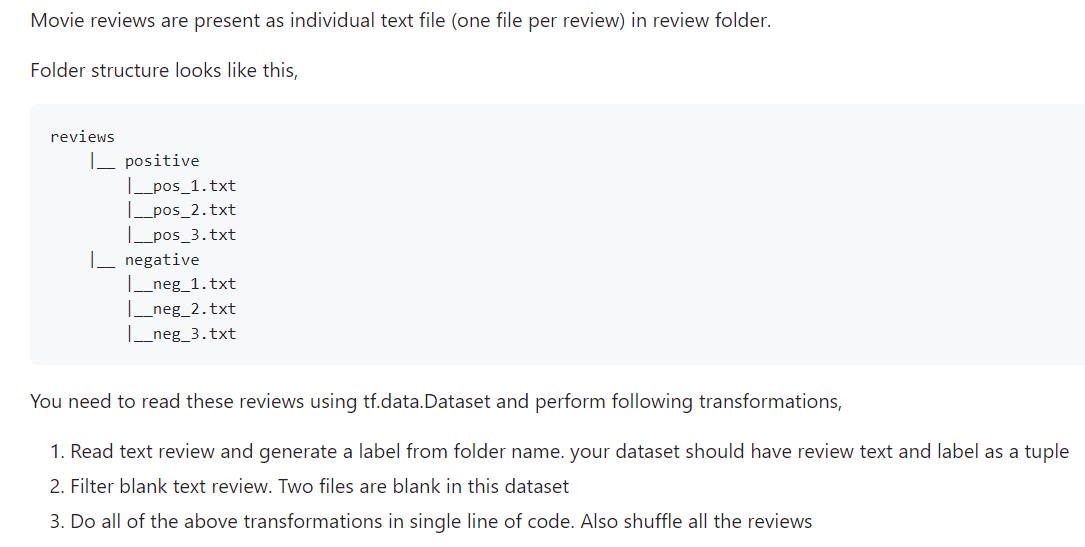

In [19]:
# Reading reviews folder
reviews_ds=tf.data.Dataset.list_files("D:/programming languages/datasets/reviews/*/*",shuffle=True)

In [20]:
for sub_folder in reviews_ds:
    print(sub_folder)

tf.Tensor(b'D:\\programming languages\\datasets\\reviews\\positive\\pos_3.txt', shape=(), dtype=string)
tf.Tensor(b'D:\\programming languages\\datasets\\reviews\\negative\\neg_2.txt', shape=(), dtype=string)
tf.Tensor(b'D:\\programming languages\\datasets\\reviews\\negative\\neg_3.txt', shape=(), dtype=string)
tf.Tensor(b'D:\\programming languages\\datasets\\reviews\\positive\\pos_1.txt', shape=(), dtype=string)
tf.Tensor(b'D:\\programming languages\\datasets\\reviews\\positive\\pos_2.txt', shape=(), dtype=string)
tf.Tensor(b'D:\\programming languages\\datasets\\reviews\\negative\\neg_1.txt', shape=(), dtype=string)


In [132]:
#function to return label 
def get_label(file_path):
    return tf.strings.split(file_path,"\\")[-2]

In [138]:
#function that returns both data and label
def prepare_dataset(file_path):
    label=get_label(file_path)
    data=tf.io.read_file(file_path)
    return data,label

In [139]:
#creating dataset that containing both data and labels
dataset=reviews_ds.map(prepare_dataset)

In [141]:
for data,label in dataset:
    print(data,"\n",label)
    print()

tf.Tensor(b"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is du

In [142]:
#filtering the dataset by removing empty data
final_ds=dataset.filter(lambda data,label:data!="")

In [140]:
for data,label in final_ds:
    print(data,"\n",label)
    print()

tf.Tensor(b"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.\n", shape=(), dtype=string) 
 tf.Tensor(b'negative', shape=(), dtype=string)

tf.Tensor(b"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened wit

**Doing above step in a single line**

In [144]:
reviews_ds1=tf.data.Dataset.list_files("D:/programming languages/datasets/reviews/*/*",shuffle=True)

In [145]:
final_ds1=reviews_ds1.map(prepare_dataset).filter(lambda data,label:data!="")

In [146]:
for data,label in final_ds1:
    print(data,"\n",label)
    print()

tf.Tensor(b'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terr

# Optimize tensorflow pipeline performance with prefetch and caching

In [2]:
import tensorflow as tf
import time

In [3]:
#checking the version of the tensorflow
tf.__version__

'2.9.1'

**Prefetch**

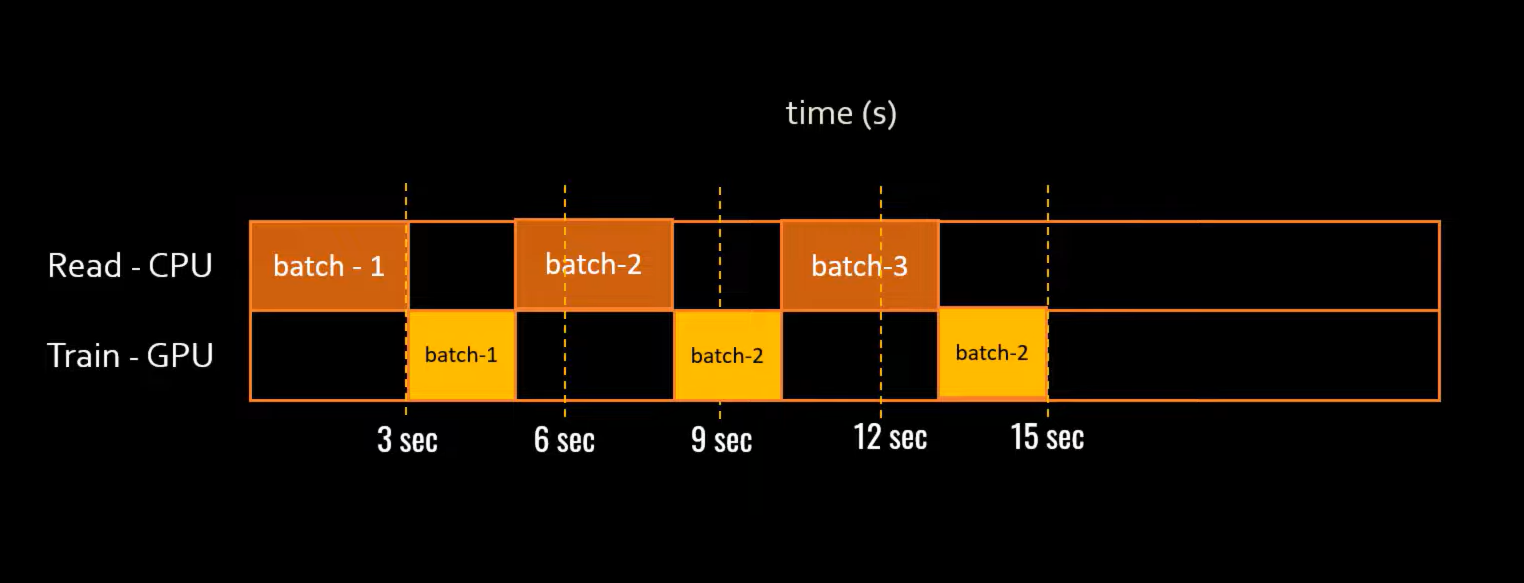

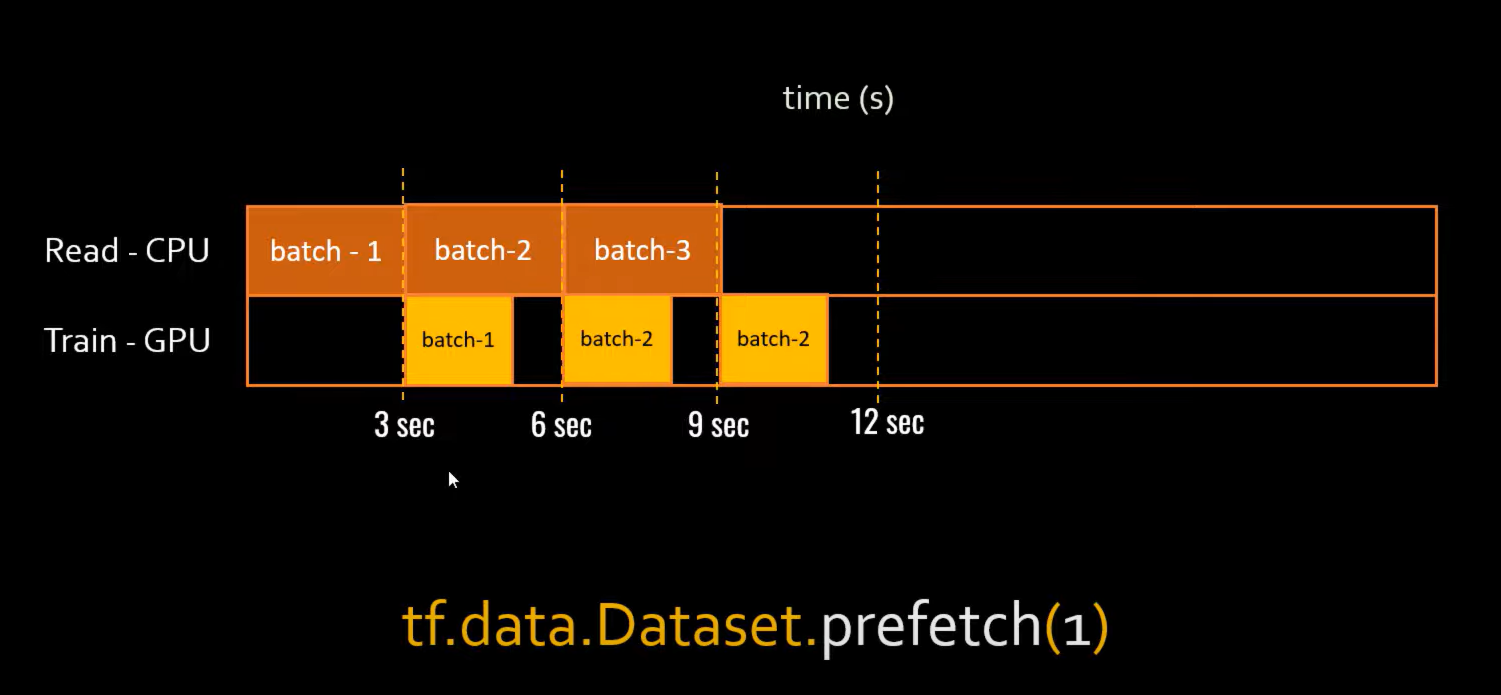

In [7]:
class FileDataset(tf.data.Dataset):
    def read_file_in_batches(num_samples):
        # Opening the file
        time.sleep(0.03)

        for sample_idx in range(num_samples):
            # Reading data (line, record) from the file
            time.sleep(0.015)

            yield (sample_idx,)

    def __new__(cls, num_samples=3):
        return tf.data.Dataset.from_generator(
            cls.read_file_in_batches,
            output_signature = tf.TensorSpec(shape = (1,), dtype = tf.int64),
            args=(num_samples,)
        )

In [8]:
def benchmark(dataset, num_epochs=2):
    for epoch_num in range(num_epochs):
        for sample in dataset:
            # Performing a training step
            time.sleep(0.01)

In [9]:
%%timeit
benchmark(FileDataset())

567 ms ± 67.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
benchmark(FileDataset().prefetch(1))

477 ms ± 42.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
benchmark(FileDataset().prefetch(tf.data.AUTOTUNE))

366 ms ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Cache**

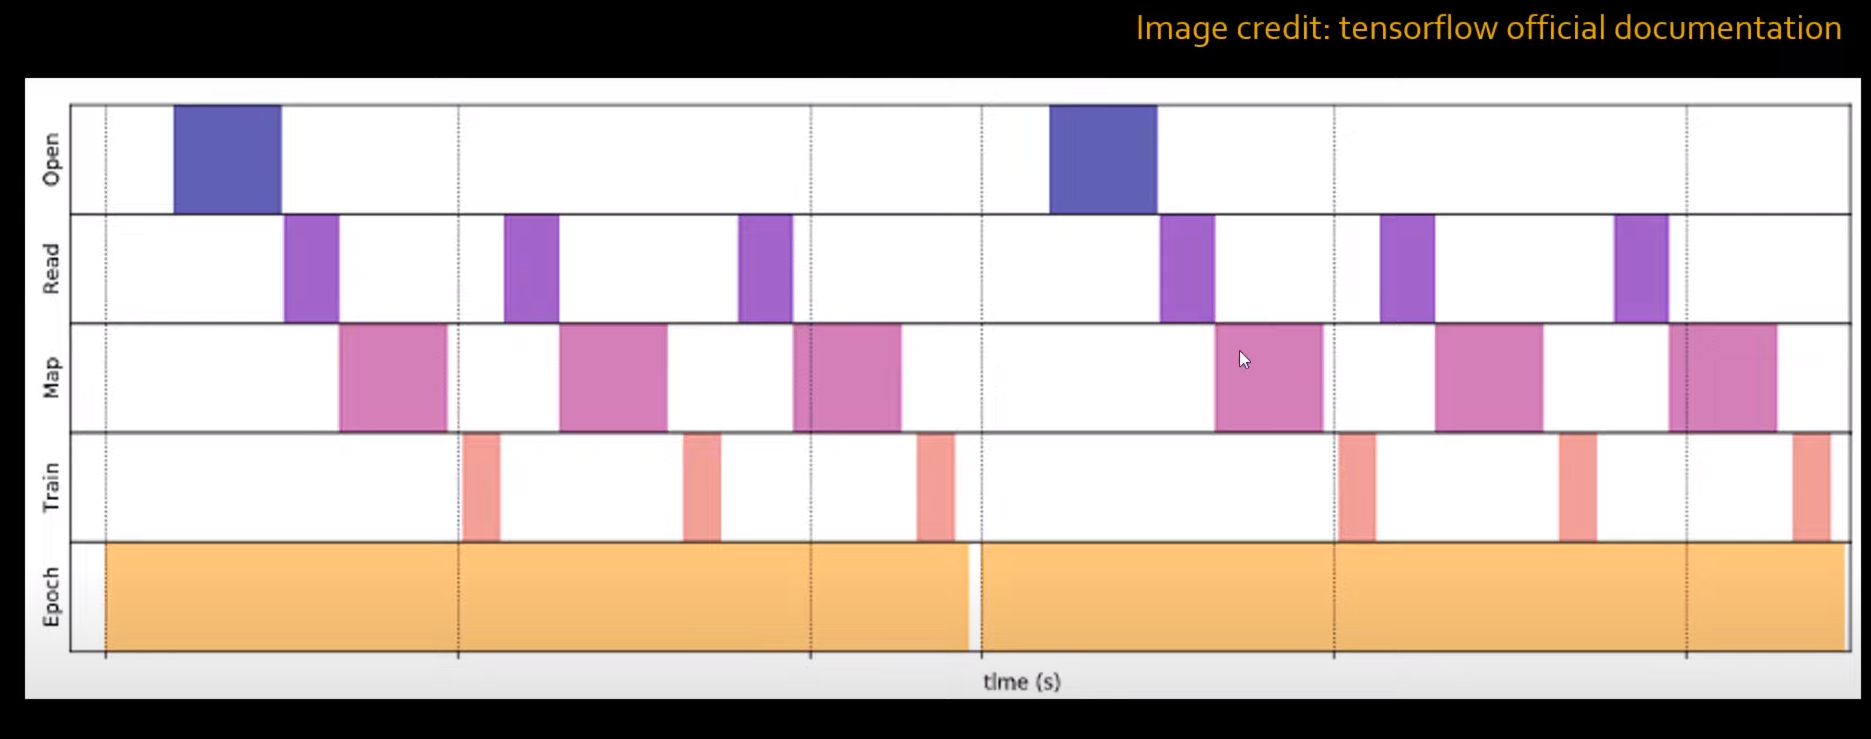

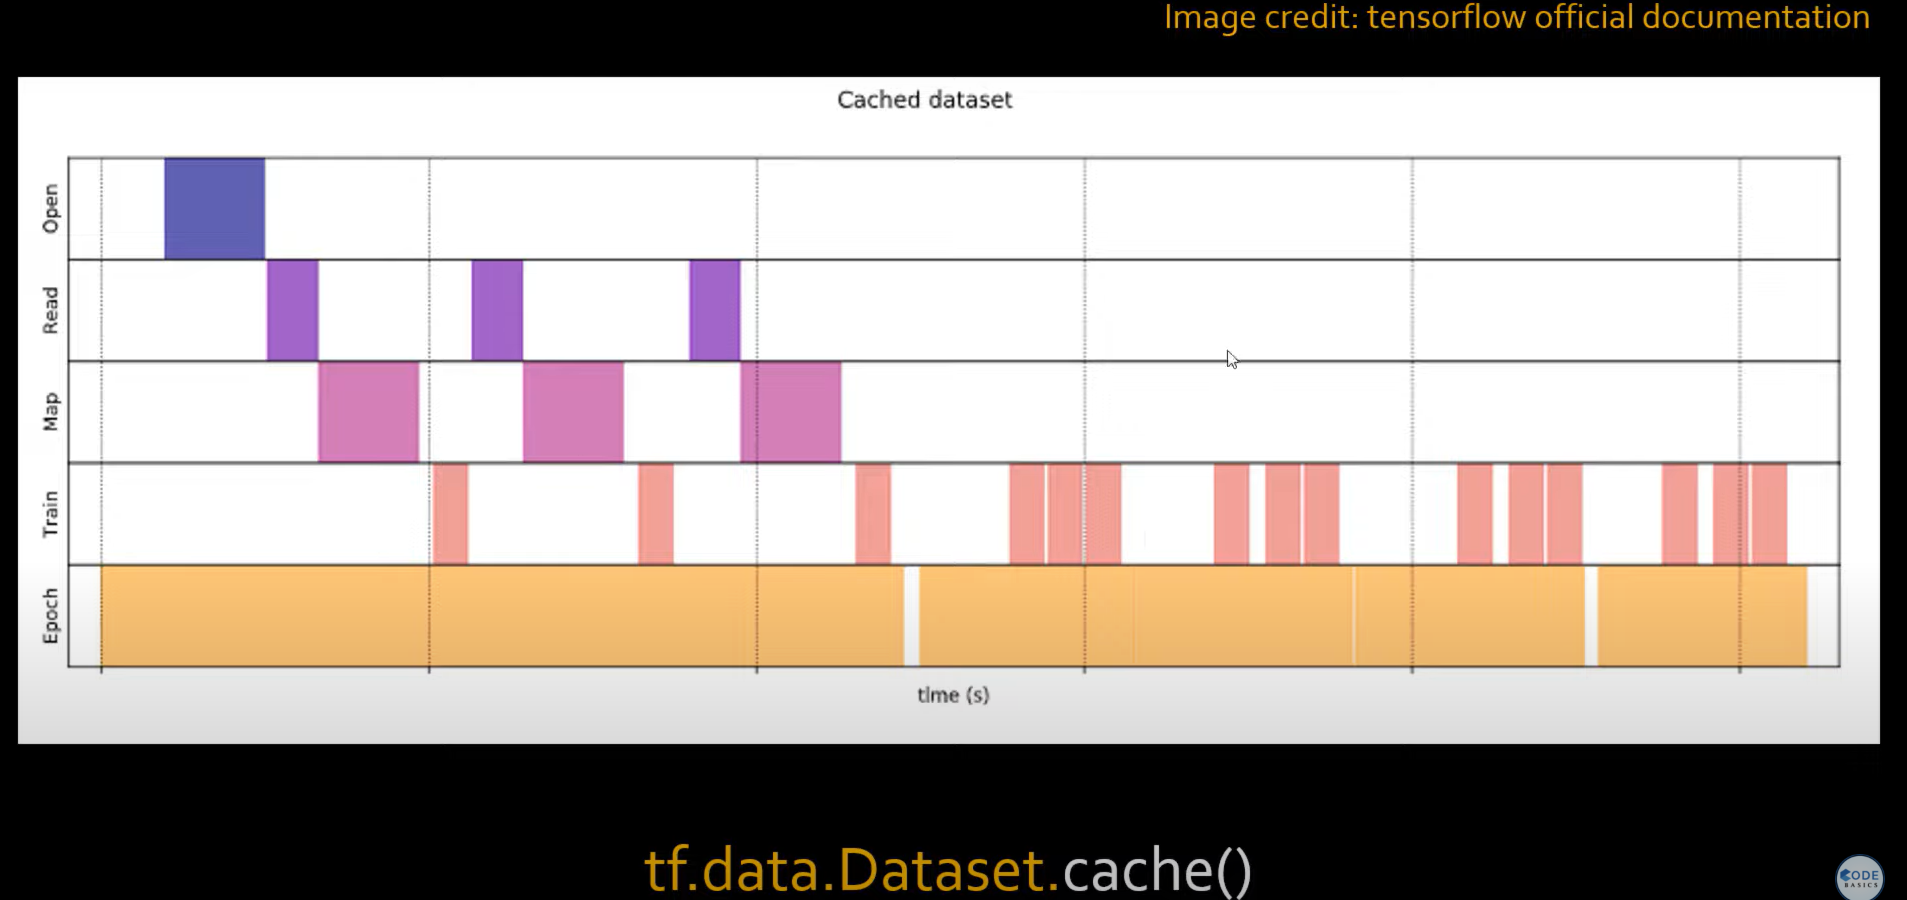

In [10]:
dataset = tf.data.Dataset.range(5)
dataset = dataset.map(lambda x: x**2)
dataset = dataset.cache("mycache.txt")
# The first time reading through the data will generate the data using
# `range` and `map`.
list(dataset.as_numpy_iterator())

[0, 1, 4, 9, 16]

In [11]:
# Subsequent iterations read from the cache.
list(dataset.as_numpy_iterator())

[0, 1, 4, 9, 16]

In [12]:
def mapped_function(s):
    # Do some hard pre-processing
    tf.py_function(lambda: time.sleep(0.03), [], ())
    return s

In [13]:
%%timeit -r1 -n1
benchmark(FileDataset().map(mapped_function), 5)

1.72 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [14]:
%%timeit -r1 -n1
benchmark(FileDataset().map(mapped_function).cache(), 5)

591 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Further reading** https://www.tensorflow.org/guide/data_performance#caching